In [512]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [513]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [514]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [515]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [516]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [517]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [518]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [519]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [520]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [521]:
z=X_train[X_train['Age_imputed'].isnull()==True]['Age_imputed']
t=X_train['Age_imputed'][X_train['Age_imputed'].isnull()]
type(t)
# # pd.DataFrame()
# b=pd.concat({'first' : z,'second' : t},axis=1,)
# b
# for index,var in b.iterrows():
#     # print(var['first'],var['second'])
#     if(var['first'] != var['second']):
#         print(var['first'] , var['second'])
#     # print(2)
# # type(t)

pandas.core.series.Series

In [522]:
X_train['Age_imputed'].isnull()

30     False
10     False
873    False
182    False
876    False
       ...  
534    False
584     True
493    False
527     True
168     True
Name: Age_imputed, Length: 712, dtype: bool

In [523]:
# X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [527]:
z=X_train[X_train['Age_imputed'].isnull()]['Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# # X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/var/folders/w4/lbqrw9sd4j58jmmm2ls54fxm0000gn/T/ipykernel_84710/407828191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z=X_train[X_train['Age_imputed'].isnull()]['Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


In [538]:
X_train['Age_imputed'].isnull().shape 
# z.shape

(712,)

In [479]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [480]:
X_train['Age_imputed'].isnull().sum()

0

In [481]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([14.  , 40.  , 29.  , 36.  , 20.  , 31.  , 23.  , 53.  , 45.  ,
       25.  , 38.  , 47.  , 50.  ,  9.  , 14.  , 33.  , 19.  , 37.  ,
       22.  , 24.  , 24.  , 22.  , 36.  , 21.  ,  3.  , 48.  , 23.  ,
       27.  , 16.  , 11.  , 48.  , 24.  , 24.  , 19.  , 40.  , 65.  ,
       40.  , 33.  , 32.  , 60.  , 29.  ,  0.83,  4.  , 36.  , 25.  ,
       31.  , 20.  , 33.  , 30.  , 47.  , 25.  , 28.  , 28.  , 54.  ,
        1.  , 22.  , 71.  , 40.  , 29.  , 25.  , 20.  , 29.  , 23.  ,
       29.  , 32.  , 24.  , 33.  , 36.  , 24.  , 20.  , 61.  , 37.  ,
       18.  , 17.  , 50.  , 62.  , 32.  , 41.  , 64.  , 24.  , 52.  ,
       35.  , 28.  , 39.  , 16.  , 16.  ,  2.  , 24.  ,  2.  , 34.  ,
       32.  ,  3.  , 62.  , 23.  , 32.  , 39.  , 32.  , 27.  , 34.  ,
       38.  , 21.  , 26.  , 32.  , 36.  , 11.  , 63.  , 24.  , 30.  ,
       20.  , 35.  ,  2.  , 47.  ,  4.  , 28.  ,  5.  , 31.  , 41.  ,
       58.  , 28.  , 35.  , 12.  ,  9.  , 35.  , 36.  , 22.  , 19.  ,
       29.  , 41.  ,

In [482]:
X_train['Age'].isnull().sum()

148

In [483]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,36.0
493,71.0,49.5042,71.0
527,NaN,221.7792,46.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


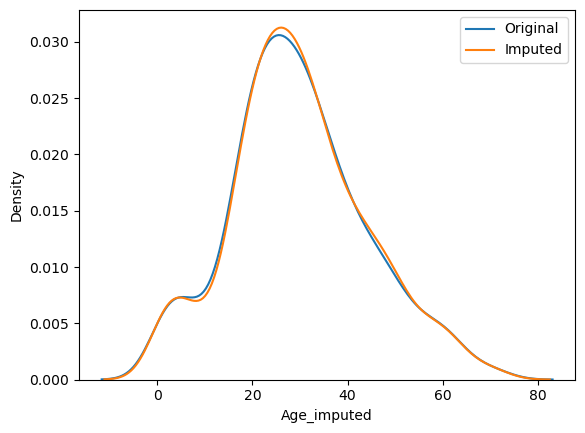

In [484]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [485]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.4618485451334


In [486]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,50.769302
Age,71.512440,204.349513,204.349513
Age_imputed,50.769302,204.349513,203.461849


<AxesSubplot:>

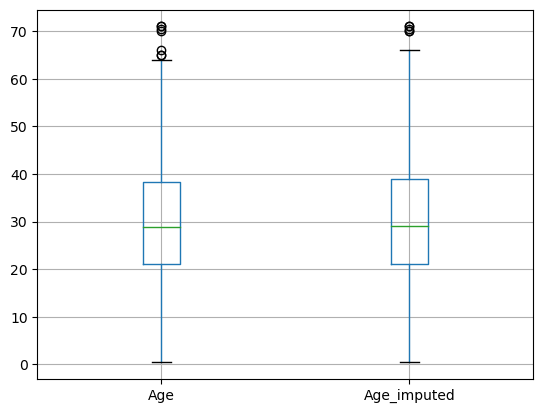

In [487]:
X_train[['Age', 'Age_imputed']].boxplot()

In [488]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [489]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [490]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [491]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [492]:
X = data
y = data['SalePrice']

In [493]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [494]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [495]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1320,Gd,TA,156500,TA,Gd
1066,TA,TA,178000,TA,TA
1433,TA,TA,186500,TA,TA
859,Gd,TA,250000,TA,Gd
1374,Gd,TA,250000,TA,Gd


In [496]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/var/folders/w4/lbqrw9sd4j58jmmm2ls54fxm0000gn/T/ipykernel_84710/856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/var/folders/w4/lbqrw9sd4j58jmmm2ls54fxm0000gn/T/ipykernel_84710/856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
/var/folders/w4/lbqrw9sd4j58jmmm2ls54fxm0000gn/T/ipykernel_84710/

In [497]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [498]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [499]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.544332
Fa,0.040917,0.053872
Po,0.027823,0.033670
Ex,0.024550,0.029181


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

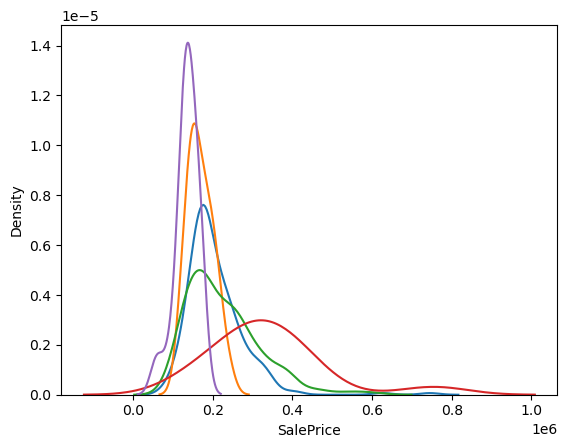

In [500]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

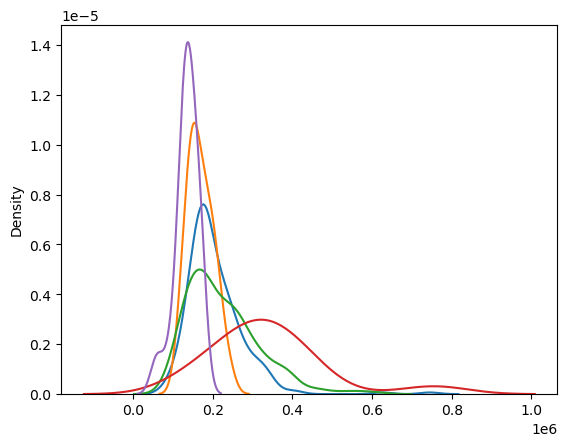

In [508]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train.loc[X_train['FireplaceQu'] == category,['SalePrice']],hist=False,label=category)
plt.show()

In [506]:
X_train.loc[X_train['FireplaceQu'] == 'Fa',['SalePrice']]

,SalePrice
504,147000
1202,117000
810,181000
215,134450
201,171500
923,193000
530,175000
384,240000
853,158000
1357,149900


In [503]:
X_train['FireplaceQu'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

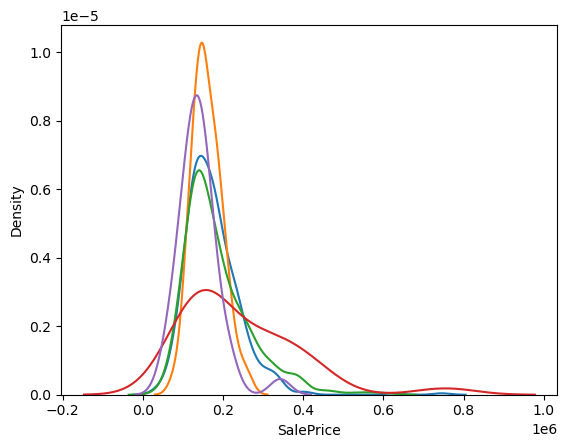

In [286]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()